In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter    
import warnings
warnings.filterwarnings("ignore")


In [2]:
train_data=pd.read_csv("../input/titanic/train.csv",index_col=False)
test_data=pd.read_csv("../input/titanic/test.csv")

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.reset_index(drop=True, inplace=True)

In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train_data.shape


(891, 12)

In [7]:
test_data.shape

(418, 11)

In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
def bar_plot(variable):
    var = train_data[variable]
    varValue = var.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

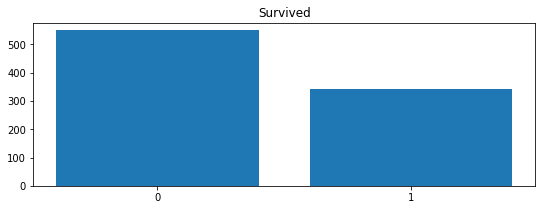

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


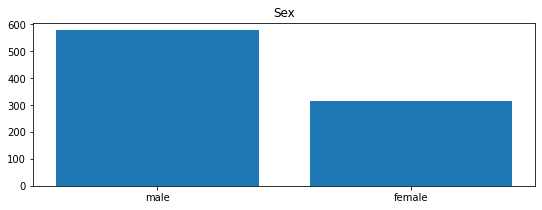

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


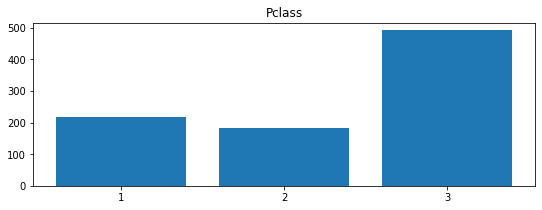

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


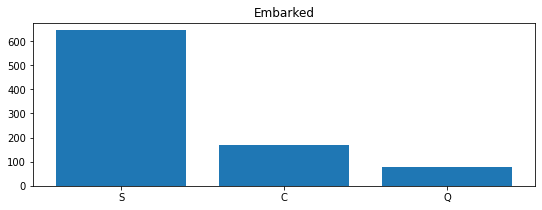

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


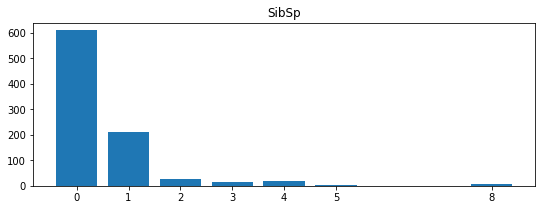

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


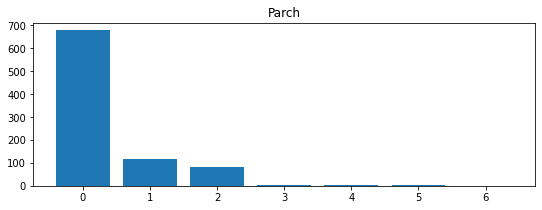

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


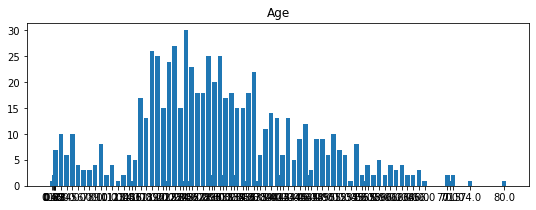

Age: 
 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


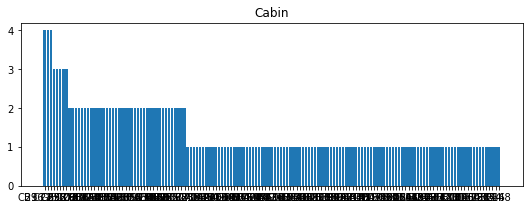

Cabin: 
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


In [13]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch","Age","Cabin"]
for c in category1:
    bar_plot(c)

In [14]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

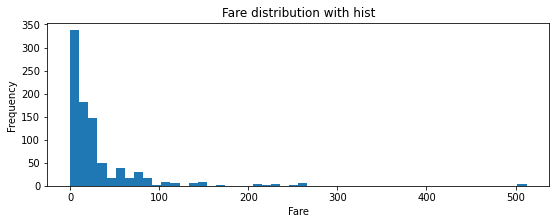

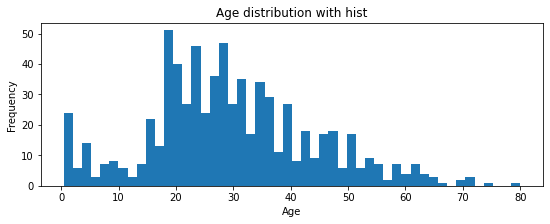

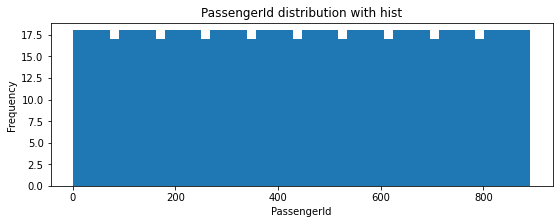

In [15]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

In [16]:
a=train_data["PassengerId"]

In [17]:
a

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

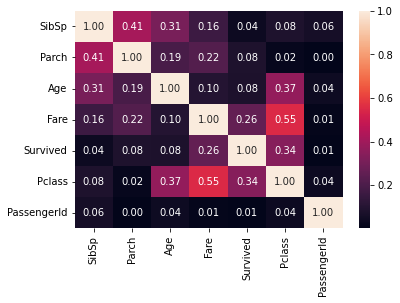

In [18]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived", "Pclass","Embarked","Name","Cabin", "PassengerId"]
sns.heatmap(train_data[list1].corr().abs(), annot = True, fmt = ".2f")
plt.show()

In [19]:
test_data.corr().abs()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.026751,0.034102,0.003818,0.043080,0.008211
Pclass,0.026751,1.000000,0.492143,0.001087,0.018721,0.577147
Age,0.034102,0.492143,1.000000,0.091587,0.061249,0.337932
SibSp,0.003818,0.001087,0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.577147,0.337932,0.171539,0.230046,1.000000


In [20]:
train_data[["Pclass","Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [21]:
train_data[["Pclass","Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [22]:
train_data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
train_data[["Sex","Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [24]:
train_data[["SibSp","Survived"]].groupby(["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [25]:
train_data[["Parch","Survived"]].groupby(["Parch"]).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [26]:
#quartiles(kartiller)

In [27]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [28]:
train_data.loc[detect_outliers(train_data,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [29]:
train_data = train_data.drop(detect_outliers(train_data,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [30]:
train_data.shape

(881, 12)

In [31]:
train_data_len = len(train_data)
td = pd.concat([train_data,test_data],axis = 0).reset_index(drop = True)

In [32]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
#Hangi verilerim eksik?

In [34]:
td.columns[td.isnull().any()]
#Survived eksik çünkü test verisinde yok

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [35]:
td.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [36]:
td[td["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [37]:
td[td["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


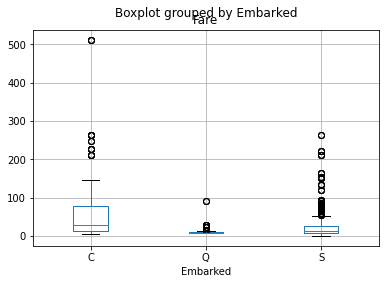

In [38]:
td.boxplot(column="Fare",by = "Embarked")
plt.show()

In [39]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   object 
 5   Age          1043 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Ticket       1299 non-null   object 
 9   Fare         1298 non-null   float64
 10  Cabin        292 non-null    object 
 11  Embarked     1297 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 121.9+ KB


Text(0.5, 1.0, 'Missing values heatmap')

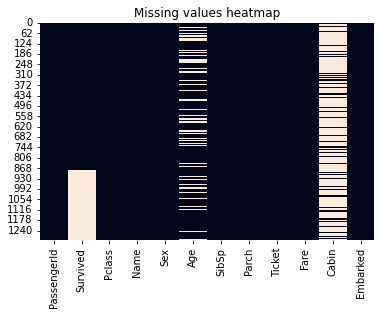

In [40]:
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [41]:
df = td

In [42]:
sasa= df[(df['Fare'] >= 79) & (df['Fare'] <= 81)]

In [43]:
sasa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.00,B28,NaN
137,140,0.0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.20,B86,C
251,257,1.0,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.20,NaN,C
257,263,0.0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
551,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S
578,586,1.0,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S
580,588,1.0,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C
782,790,0.0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.20,B82 B84,C
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.00,B28,NaN
1208,1219,NaN,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46.0,0,0,PC 17585,79.20,NaN,C


In [44]:
sasa.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,11.000000,9.000000,11.0,10.000000,11.000000,11.000000,11.000000
mean,598.454545,0.666667,1.0,43.300000,0.363636,0.545455,79.468182
std,410.016918,0.500000,0.0,14.142528,0.504525,0.687552,0.331114
min,62.000000,0.000000,1.0,18.000000,0.000000,0.000000,79.200000
25%,260.000000,0.000000,1.0,38.250000,0.000000,0.000000,79.200000
50%,586.000000,1.000000,1.0,46.000000,0.000000,0.000000,79.200000
75%,810.000000,1.000000,1.0,51.000000,1.000000,1.000000,79.650000
max,1289.000000,1.000000,1.0,62.000000,1.000000,2.000000,80.000000


In [45]:
import missingno as msno

In [46]:
#msno.heatmap(df)

In [47]:
sasa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.00,B28,NaN
137,140,0.0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.20,B86,C
251,257,1.0,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.20,NaN,C
257,263,0.0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
551,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S
578,586,1.0,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S
580,588,1.0,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C
782,790,0.0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.20,B82 B84,C
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.00,B28,NaN
1208,1219,NaN,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46.0,0,0,PC 17585,79.20,NaN,C


In [48]:
def bar_plot(variable):
    var = sasa[variable]
    varValue = var.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

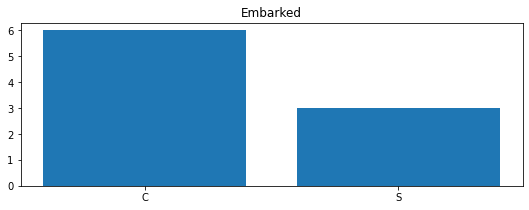

Embarked: 
 C    6
S    3
Name: Embarked, dtype: int64


In [49]:
category1 = ["Embarked"]
for c in category1:
    bar_plot(c)

In [50]:
df["Embarked"] = df["Embarked"].fillna("C")


In [51]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [52]:
df["Embarked"].count()

1299

In [53]:
df.shape

(1299, 12)

In [54]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [55]:
df[df["Pclass"]==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
df[df["Pclass"]==3].mean()

PassengerId    642.142450
Survived         0.245868
Pclass           3.000000
Age             24.816367
SibSp            0.494302
Parch            0.384615
Fare            12.741220
dtype: float64

In [57]:
df["Fare"] = df["Fare"].fillna(np.mean(df[df["Pclass"]==3].mean()))

In [58]:
df[df["Fare"].isnull()].shape

(0, 12)

In [59]:
df.columns[df.isnull().any()]

Index(['Survived', 'Age', 'Cabin'], dtype='object')

In [60]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [61]:
df.corr().abs()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.003089,0.041372,0.026685,0.035835,0.019635,0.049090
Survived,0.003089,1.000000,0.334097,0.076867,0.003330,0.092819,0.264613
Pclass,0.041372,0.334097,1.000000,0.411777,0.044041,0.016823,0.560941
Age,0.026685,0.076867,0.411777,1.000000,0.242127,0.148784,0.191552
SibSp,0.035835,0.003330,0.044041,0.242127,1.000000,0.350474,0.131214
Parch,0.019635,0.092819,0.016823,0.148784,0.350474,1.000000,0.202378
Fare,0.049090,0.264613,0.560941,0.191552,0.131214,0.202378,1.000000


In [62]:
df["Sex"] = df["Sex"].replace({'female' : 0 ,'male' : 1}) 

In [63]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [64]:
df.corr().abs()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.003089,0.041372,0.013353,0.026685,0.035835,0.019635,0.049090
Survived,0.003089,1.000000,0.334097,0.546015,0.076867,0.003330,0.092819,0.264613
Pclass,0.041372,0.334097,1.000000,0.124138,0.411777,0.044041,0.016823,0.560941
Sex,0.013353,0.546015,0.124138,1.000000,0.063244,0.119559,0.212624,0.182710
Age,0.026685,0.076867,0.411777,0.063244,1.000000,0.242127,0.148784,0.191552
SibSp,0.035835,0.003330,0.044041,0.119559,0.242127,1.000000,0.350474,0.131214
Parch,0.019635,0.092819,0.016823,0.212624,0.148784,0.350474,1.000000,0.202378
Fare,0.049090,0.264613,0.560941,0.182710,0.191552,0.131214,0.202378,1.000000


In [65]:
df.groupby("Pclass")["Age"].mean()

Pclass
1    39.343132
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [66]:
df["Age"].fillna(df.groupby("Pclass")["Age"].transform("mean"), inplace=True)


In [67]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [68]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

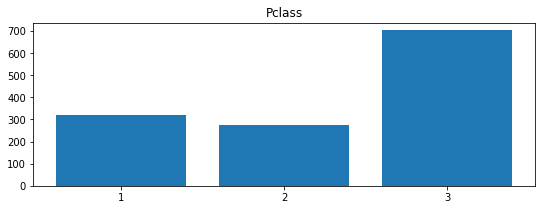

Pclass: 
 3    702
1    320
2    277
Name: Pclass, dtype: int64


In [69]:
category1 = ["Pclass"]
for c in category1:
    bar_plot(c)

In [70]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,1299.000000,881.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,657.093149,0.385925,2.294072,0.645112,29.395111,0.452656,0.372594,32.619189
std,377.743244,0.487090,0.837150,0.478664,13.173028,0.879416,0.857157,50.707320
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,331.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,657.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200
75%,984.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,30.695800
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [71]:
df.columns[df.isnull().any()]

Index(['Survived', 'Cabin'], dtype='object')

In [72]:
df[df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",1,24.816367,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",0,28.000000,0,0,347086,7.7750,NaN,S
1294,1305,NaN,3,"Spector, Mr. Woolf",1,24.816367,0,0,A.5. 3236,8.0500,NaN,S
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",1,24.816367,0,0,359309,8.0500,NaN,S


In [73]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",1,24.816367,0,0,A.5. 3236,8.0500,NaN,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",1,24.816367,0,0,359309,8.0500,NaN,S


In [74]:
df.drop('Cabin',axis= 1,inplace= True )

In [75]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",1,24.816367,0,0,A.5. 3236,8.0500,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
1297,1308,NaN,3,"Ware, Mr. Frederick",1,24.816367,0,0,359309,8.0500,S
